### Import Library

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### 1. Data Acquisition

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d "radheshyamkollipara/bank-customer-churn"

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
bank-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip bank-customer-churn.zip

Archive:  bank-customer-churn.zip
replace Customer-Churn-Records.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Customer-Churn-Records.csv  


###  2. Read the Data

In [82]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [83]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
df.shape

(10000, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### 3. Data Cleaning

In [87]:
# removing the columns not useful
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [11]:
# check missing/NA values
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


### 4. Data Visualization

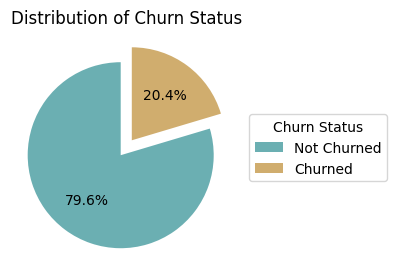

In [89]:
# Distribution of Exited Status

# Count unique values in the 'Exited' column
exit_counts = df['Exited'].value_counts()

# add labels
labels = ['Not Churned' if val == 0 else 'Churned' for val in exit_counts.index]

# Plot pie chart
plt.figure(figsize=(3, 4))
plt.pie(exit_counts, autopct='%1.1f%%', startangle=90, colors=['#6bafb2','#d0ad6e'], explode=(0.1, 0.1))
plt.title('Distribution of Churn Status')

# Add legend
plt.legend(labels, title="Churn Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

**Insight:** The percentage of customers who churned (20.4%) is lower than the percentage of customers who did not churn (79.6%).

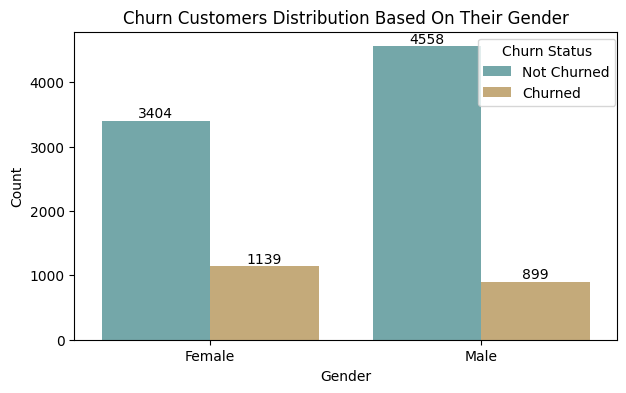

In [93]:
# Exited Customers Distribution Based On Their Gender

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Gender', hue='Exited', palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Churn Customers Distribution Based On Their Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.legend(title='Churn Status', loc='upper right', bbox_to_anchor=(1.01, 1), labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Although both genders have higher counts of "Not Churned" customers, female customers have a relatively higher churn proportion than male customers, indicating a larger fraction of female customers are leaving the bank.

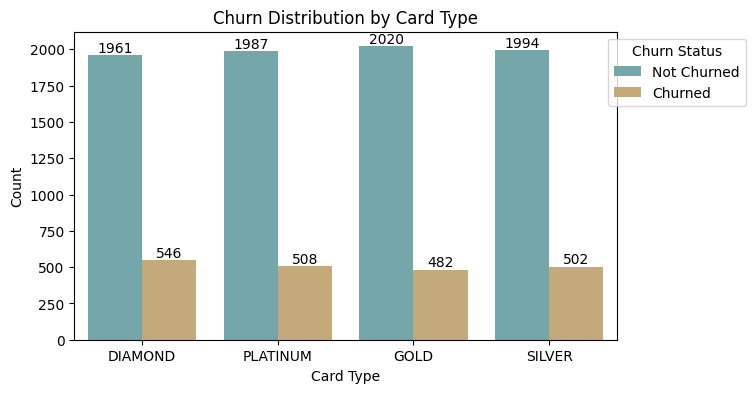

In [94]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Card Type', hue='Exited', palette={0: '#6bafb2', 1: '#d0ad6e'}, order=['DIAMOND', 'PLATINUM', 'GOLD', 'SILVER'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.legend(title='Churn Status', loc='best', bbox_to_anchor=(1.25, 1), labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Despite slight differences, churn rates are relatively similar across all card types, with each type showing a higher count of "Not Churned" customers than "Churned."

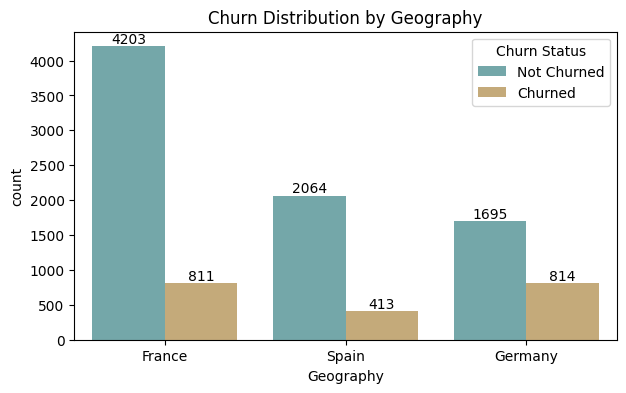

In [97]:
# Exited Customers Distribution Based On Their Geography

plt.figure(figsize=(7, 4))
sns.countplot(x='Geography', hue='Exited', data=df, palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Churn Distribution by Geography')

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.legend(title='Churn Status', loc='best', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Customers in France have the highest churn and retention numbers, while Germany and Spain show lower customer counts with similarly reduced churn rates.

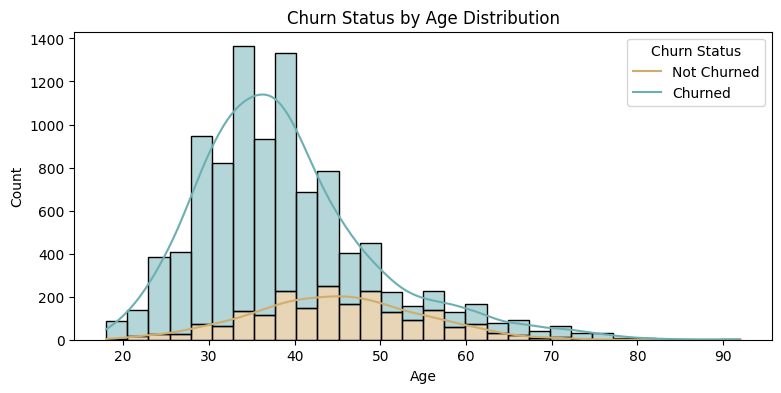

In [99]:
# Exited Customers Distribution Based On Age Group
plt.figure(figsize=(9, 4))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde=True, palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Churn Status by Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn Status', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** The distribution shows that churn rates are highest among customers in their 30s and 40s, while non-churned customers are concentrated in the >60 age range, suggesting that younger to middle-aged customers are more likely to leave, whereas older customers are more likely to stay

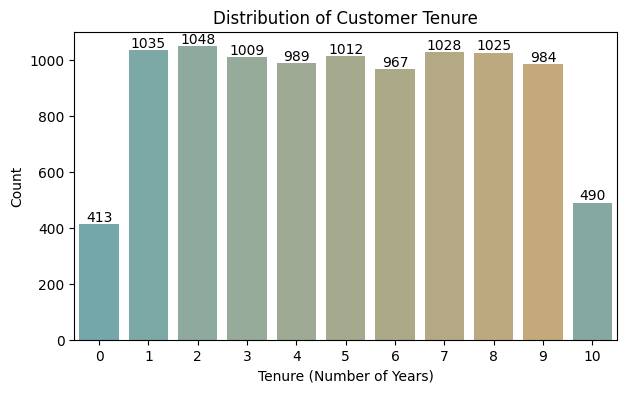

In [100]:
# Define start and end colors
start_color = '#6bafb2'
end_color = '#d0ad6e'

# Generate a range of colors between start and end colors
num_tenure_levels = len(df['Tenure'].unique())
palette = [mcolors.to_hex(c) for c in mcolors.LinearSegmentedColormap.from_list("", [start_color, end_color])(np.linspace(0, 1, num_tenure_levels))]

# Convert unique Tenure values to strings and sort them
tenure_values = sorted(df['Tenure'].astype(str).unique())
color_palette = {tenure: palette[i] for i, tenure in enumerate(tenure_values)}

plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='Tenure', palette=color_palette)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.show()

**Insight:** The distribution shows that customer tenure is relatively stable between 1 to 8 years, with a noticeable drop at 0 and 10 years, indicating fewer new and very long-term customers.

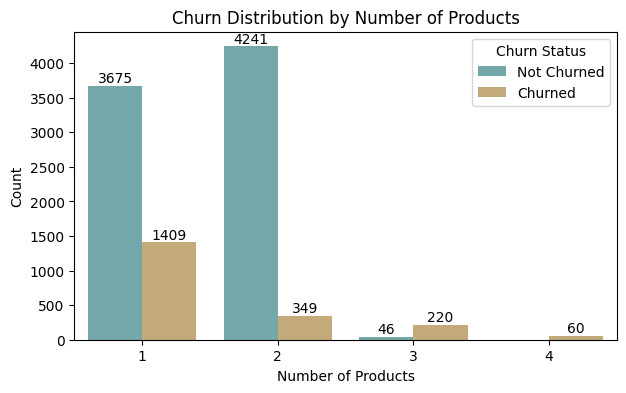

Churn Percentage by Number of Products:
NumOfProducts
1     27.7
2      7.6
3     82.7
4    100.0
Name: Exited, dtype: float64


In [103]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.legend(title='Churn Status', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

# Calculate churn percentages by number of products and round to 1 decimal place
churn_percentage_by_product_count = (df.groupby('NumOfProducts')['Exited'].mean() * 100).round(1)

# Display churn percentage by number of products
print("Churn Percentage by Number of Products:")
print(churn_percentage_by_product_count)

**Insight:** Customers who hold 3 or 4 products show an increased likelihood of churning, while those with 2 products are less likely to leave the bank compared to customers with only 1 product.

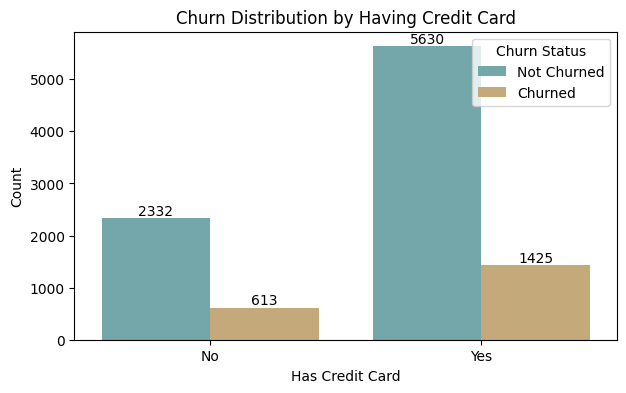

In [104]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='HasCrCard', hue='Exited', palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.legend(title='Churn Status', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

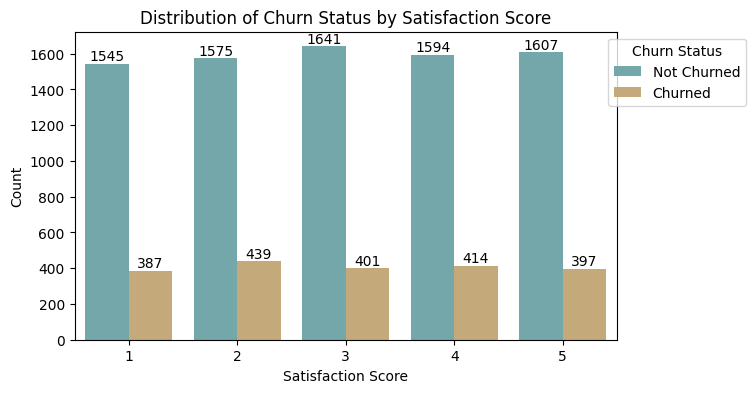

In [105]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Satisfaction Score', hue='Exited', order=[1, 2, 3, 4, 5], palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Distribution of Churn Status by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.legend(title='Churn Status', loc='upper right', bbox_to_anchor=(1.25, 1), labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** The churn rate remains relatively stable across all satisfaction scores, indicating that satisfaction score alone may not be a strong predictor of churn, as a similar proportion of customers churn regardless of their satisfaction level.

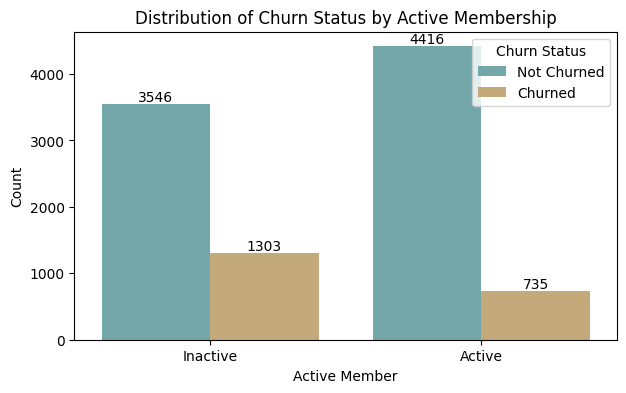

In [107]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Distribution of Churn Status by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.legend(title='Churn Status', loc='upper right', bbox_to_anchor=(1, 1), labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Active members tend to have a higher likelihood of staying (not churning) compared to inactive members.

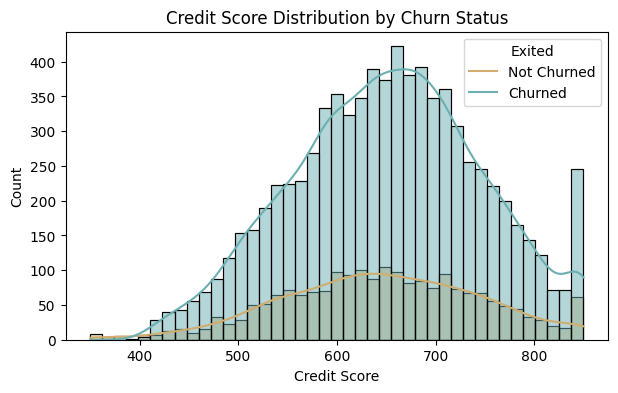

In [108]:
plt.figure(figsize=(7, 4))
sns.histplot(df, x='CreditScore', hue='Exited', kde=True, palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Customers with lower credit scores (400-500 range) show a higher tendency to churn, indicating a likelihood for churn among this group.
Conversely, customers with higher credit scores (700-800 range) exhibit a greater tendency to stay with the service, suggesting higher retention rates among this cohort.

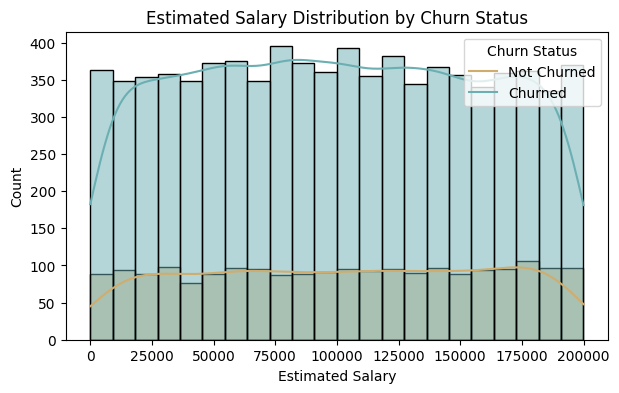

In [112]:
plt.figure(figsize=(7, 4))
sns.histplot(df, x='EstimatedSalary', hue='Exited', kde=True, palette={0: '#6bafb2', 1: '#d0ad6e'})
plt.title('Estimated Salary Distribution by Churn Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.legend(title='Churn Status', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

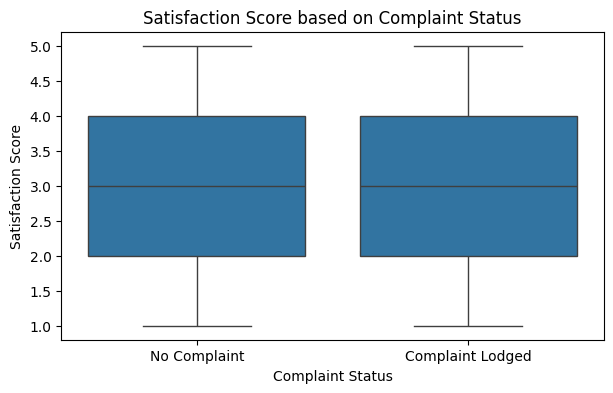

In [109]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Complain', y='Satisfaction Score')
plt.title('Satisfaction Score based on Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Satisfaction Score')
plt.xticks(ticks=[0, 1], labels=['No Complaint', 'Complaint Lodged'])  # Set x-axis labels
plt.show()

### 5. Data Preparation

#### 1) Label Encoding
The reason for using one-hot encoding is that categorical data is often nominal and non-ordinal.

In [114]:
# Apply one-hot encoding
cat_col = ['Geography', 'Gender', 'Card Type']

df_encoded = pd.get_dummies(df, columns=cat_col, drop_first=True)
display(df_encoded)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,False,False,True,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564,False,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,True,False,True,True,False,False


In [115]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


#### 2) Correlation Matrix

<Axes: >

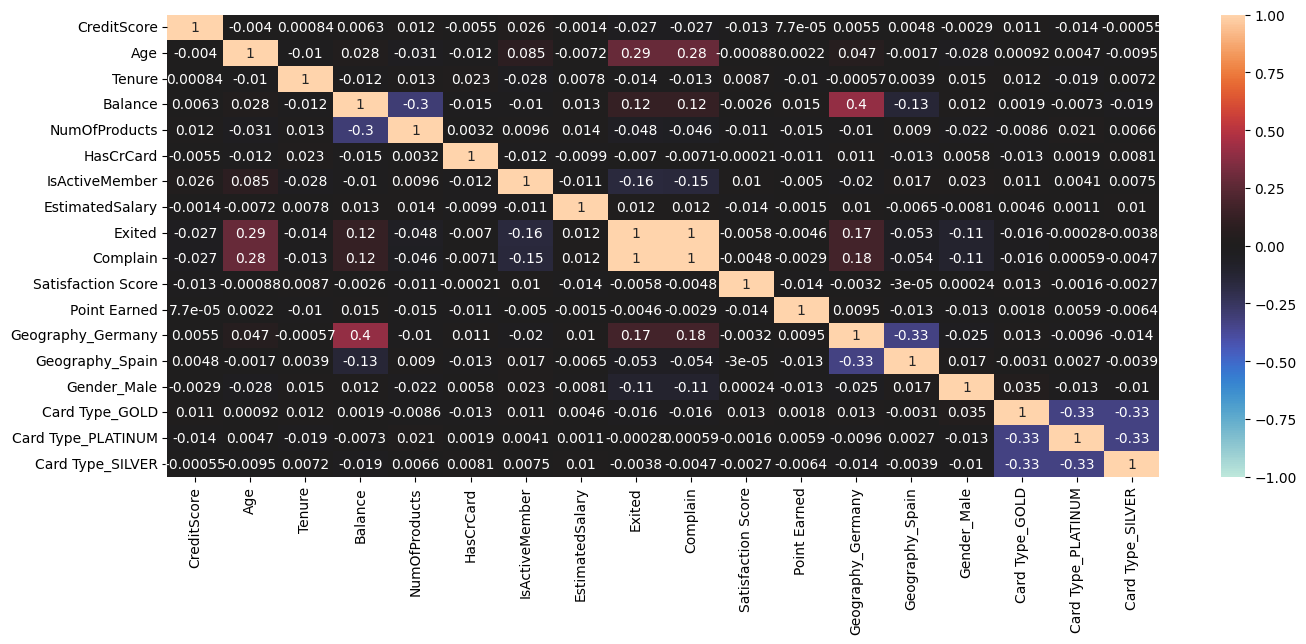

In [50]:
num_col = df_encoded.select_dtypes(exclude=['object']).columns.tolist()

plt.figure(figsize=(16, 6))
sns.heatmap(df_encoded.loc[:,num_col].corr(),vmin=-1,vmax=1,center=0,annot=True)

# Variables should be included are IsActiveMember, Balance, Complain, NumOfProducts and Age

**Insight:**

1. CreditScore:Very weak correlations with other variables, including Exited (churn). This suggests that credit score does not play a major role in influencing churn or relationships with other variables in this dataset.
2. Age: Moderately positively correlated with Exited (0.29), indicating that older customers are more likely to churn.Also has a positive correlation with Complain (0.28), suggesting that older customers tend to file more complaints.
3. Tenure: Weak correlations with other variables. This implies that the number of years a customer has been with the bank doesn’t strongly affect churn or show clear relationships with other factors in the dataset.
4. Balance:Negatively correlated with NumOfProducts (-0.3), meaning customers with higher balances tend to have fewer products. This could suggest that wealthier customers might not need as many financial products.
Low correlations with other variables, indicating that balance alone doesn’t strongly predict churn or interact significantly with other factors.
5. NumOfProducts:Negatively correlated with Balance (-0.3) and has a slight positive correlation with Exited (0.1). This suggests that while customers with more products are slightly more prone to churn, the relationship is weak.
6. HasCrCard:Shows very low correlations with other variables, meaning having a credit card does not seem to influence churn or other factors significantly in this dataset.
7. IsActiveMember: Weakly negatively correlated with Exited (-0.11), indicating that active members are somewhat less likely to churn.
8. EstimatedSalary:Exhibits very low correlations with all other variables, including Exited. This suggests that salary has minimal influence on churn and little interaction with other factors.
9. Exited:Shows positive correlations with Age (0.29), Complain (0.17), and Geography_Germany (0.4). This indicates that older customers, customers who frequently complain, and customers from Germany are more likely to churn.
These correlations highlight these as the factors most closely associated with churn in this dataset.
10. Complain: Positively correlated with Exited (0.17) and Age (0.28). This suggests that customers who file complaints are more likely to churn and that complaints are more common among older customers.
11. Satisfaction Score: Shows low correlations with other variables, including churn. This indicates that satisfaction score alone may not be a strong predictor of churn.
12. Point Earned: Very weak correlations with other variables, meaning that loyalty points earned do not seem to relate strongly to churn or other factors in this dataset.
13. Geography_Germany:Positively correlated with Exited (0.4), indicating that customers from Germany are more likely to churn than those from other regions.
14. Geography_Spain:Negatively correlated with Geography_Germany (-0.33), as customers can only belong to one geographic category.
15. Gender_Male:Shows low correlations with other variables, indicating that gender has minimal direct influence on churn or other factors.
16. Card Type (GOLD, PLATINUM, SILVER):Strong negative correlations among the card types (-0.33), reflecting that each customer can only have one type of card at a time.

**In summary**, the factors with the most notable associations with Exited (churn) are Age, Geography_Germany, and Complain, while other variables like Balance, NumOfProducts, and IsActiveMember show weak relationships that may still contribute to understanding churn when combined with other factors.

#### 3) Feature Scaling

In [40]:
num_col_n = [col for col in num_col if col != 'Exited']

scaler = StandardScaler()
df_encoded[num_col_n] = scaler.fit_transform(df_encoded[num_col_n])

In [41]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,1.972908,-0.721130,-0.630839,False,False,False,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,1.972908,-0.009816,-0.666251,False,True,False,False,False,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,1.972908,-0.009816,-1.015942,False,False,False,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0,-0.506866,1.412812,-1.135457,False,False,False,True,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,-0.506866,1.412812,-0.803472,False,True,False,True,False,False


#### 3) Train Test Split

In [42]:
X = df_encoded.drop('Exited', axis=1)  # Features
y = df_encoded['Exited']  # Target variable

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 17), (2000, 17), (8000,), (2000,))

### 6. Data Modelling

#### 1) Random Forest

In [71]:
# Train Models
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [72]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy of the Random Forest model:", rf_accuracy)

Accuracy of the Random Forest model: 0.9995


In [73]:
# Generating the classification report
rf_class_report = classification_report(y_test, rf_predictions)
print("\nClassification Report of Random Forest Model:")
print(rf_class_report)


Classification Report of Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       1.00      1.00      1.00       414

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



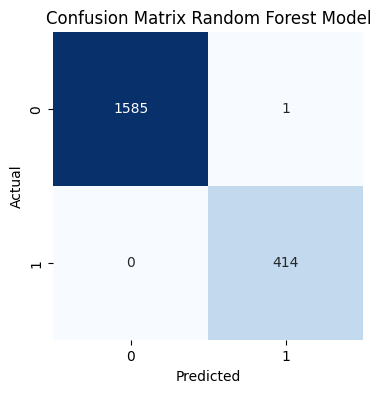

In [74]:
# Confusion Matrix Visualization
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(4,4))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest Model")
plt.show()

In [75]:
# Hyperparameter Tuning

# Hyperparameter grid for Random Forest Classifier
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# Grid Search Cross Validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# Compare Model Performance
grid_search_rf_predictions = grid_search_rf.predict(X_test)
grid_search_rf_accuracy = accuracy_score(y_test, grid_search_rf_predictions)
grid_search_rf_F1_Score = f1_score(y_test, grid_search_rf_predictions)

print("Grid Search Accuracy:",grid_search_rf_accuracy)
print("Grid Search F1-Score",grid_search_rf_F1_Score)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Grid Search Accuracy: 0.9995
Grid Search F1-Score 0.9987937273823885


**Insight:**
*   Despite hyperparameter tuning, the accuracy remains the same at 0.9995, indicating that we are unable to unhance the model’s performance.
*   Model's accuracy of 99.95% and F1-Score of 0.999 indicates a highly efficient model.

#### 2) Gradient Boosting

In [76]:
# Train GBC Model
gb_model = GradientBoostingClassifier(random_state=123)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Calculate the accuracy of the model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Accuracy of the Gradient Boosting Classifier:", gb_accuracy)

Accuracy of the Gradient Boosting Classifier: 0.999


In [79]:
# Generating the classification report
gb_class_report = classification_report(y_test, gb_predictions)
print("\nClassification Report of GB Model:")
print(gb_class_report)


Classification Report of GB Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       1.00      1.00      1.00       414

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



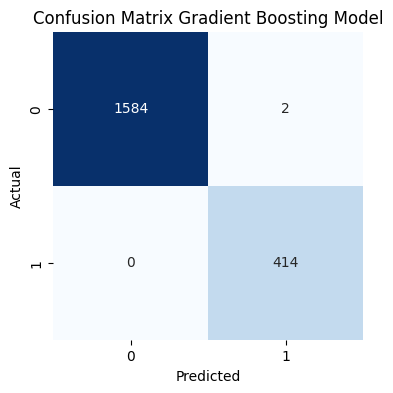

In [80]:
# Confusion Matrix Visualization
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)
plt.figure(figsize=(4,4))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Gradient Boosting Model")
plt.show()

In [78]:
# Hyperparameter Tuning

# Hyperparameter grid for GB
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4],
}

# Grid Search Cross Validation
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters:", best_params_gb)

# Compare Model Performance
grid_search_gb_predictions = grid_search_gb.predict(X_test)
grid_search_gb_accuracy = accuracy_score(y_test, grid_search_gb_predictions)
grid_search_gb_F1_Score = f1_score(y_test, grid_search_gb_predictions)

print("Grid Search Accuracy:",grid_search_gb_accuracy)
print("Grid Search F1-Score",grid_search_gb_F1_Score)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Grid Search Accuracy: 0.999
Grid Search F1-Score 0.9975903614457832


### 7. Conclusion

In this notebook, we conducted an **analysis and built a predictive model for customer churn in a bank**, using a dataset that includes a range of customer attributes. Throughout the analysis, we gained valuable insights into the key factors influencing customer churn and developed a machine learning model to make predictions.

Our exploratory data analysis highlighted several important observations.We observed that factors such as **age, geography, and the frequency of complaints had a significant impact** on customer churn. Additionally, we noted that variables like **balance, the number of products held, and active membership status showed weaker correlations with churn** but may still provide valuable insights when considered alongside other factors.

Using machine learning techniques, we developed predictive models for customer churn by comparing two algorithms: Random Forest and Gradient Boosting Classifier. Through hyperparameter tuning, we optimized each model and evaluated their performance using metrics such as accuracy, precision, recall, and F1 score. The results showed a slight difference in performance between the two models, with **Random Forest emerging as the best-performing model overall.**

### 8. Recommendation

**1. Target High-Risk Customers**: Utilize the insights gained from the analysis to identify customers at high risk of churning based on key factors such as age, geography, and complaint frequency. Implement targeted retention strategies for these segments, including personalized communication and outreach. For example, consider creating specific campaigns that address common concerns or needs relevant to these demographics, thereby fostering a stronger relationship with at-risk customers.

**2. Enhance Customer Support***: Focus on improving customer support services to reduce the frequency of complaints, a significant predictor of churn. Invest in training staff to handle issues more effectively and increase the responsiveness of support channels. Implement a proactive approach by reaching out to customers who have previously filed complaints to ensure their concerns have been resolved, and provide follow-up support to enhance their experience and satisfaction.

**3. Offer Personalized Incentives**: Leverage the predictive model to craft personalized offers or incentives for customers identified as at risk of churning. This could include discounts on fees, loyalty rewards, or exclusive promotions tailored to their preferences and banking behavior. By making customers feel valued and appreciated, the bank can encourage them to remain engaged and reduce the likelihood of churn.